<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/p1_p2_aggregation_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df_P1 = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv')
df_P2 = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/P2_Merged_Normalized_avg.csv')


In [99]:
df_P1.columns

Index(['ISO3', 'name', 'heatwave_frequency_absolute',
       'heatwave_frequency_absolute_min', 'heatwave_frequency_absolute_max',
       'heatwave_frequency_relative', 'heatwave_frequency_relative_min',
       'heatwave_frequency_relative_max', 'heatwave_duration_absolute',
       'heatwave_duration_absolute_min',
       ...
       'fire_frequency_absolute_max', 'fire_frequency_relative',
       'fire_frequency_relative_min', 'fire_frequency_relative_max',
       'fire_FRP_absolute', 'fire_FRP_absolute_min', 'fire_FRP_absolute_max',
       'fire_FRP_relative', 'fire_FRP_relative_min', 'fire_FRP_relative_max'],
      dtype='object', length=104)

In [100]:
df_P2.columns

Index(['iso3', 'P2_WASH_Drinking_Water_value_normalized',
       'P2_WASH_Drinking_Water_min', 'P2_WASH_Drinking_Water_max',
       'P2_WASH_Sanitation_value_normalized', 'P2_WASH_Sanitation_min',
       'P2_WASH_Sanitation_max', 'P2_LSCED_value_normalized', 'P2_LSCED_min',
       'P2_LSCED_max', 'P2_Nutrition_Stunting_Modeled_value_normalized',
       'P2_Nutrition_Stunting_Modeled_min',
       'P2_Nutrition_Stunting_Modeled_max',
       'P2_Child_Mortality_value_normalized', 'P2_Child_Mortality_min',
       'P2_Child_Mortality_max', 'P2_Immunization_DTP1_value_normalized',
       'P2_Immunization_DTP1_min', 'P2_Immunization_DTP1_max',
       'P2_Immunization_DTP3_value_normalized', 'P2_Immunization_DTP3_min',
       'P2_Immunization_DTP3_max', 'P2_PT_Labor_value_normalized',
       'P2_PT_Labor_min', 'P2_PT_Labor_max',
       'P2_Learning_Poverty_value_normalized', 'P2_Learning_Poverty_min',
       'P2_Learning_Poverty_max', 'P2_ED_CR_L2_value_normalized',
       'P2_ED_CR_L2_min', '

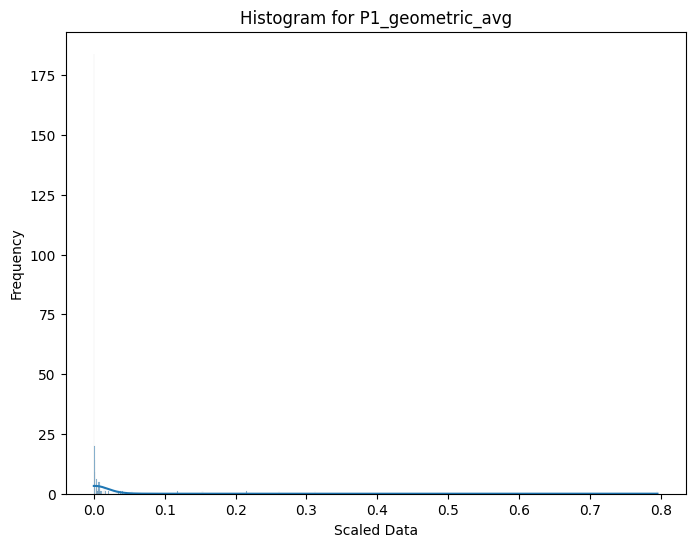

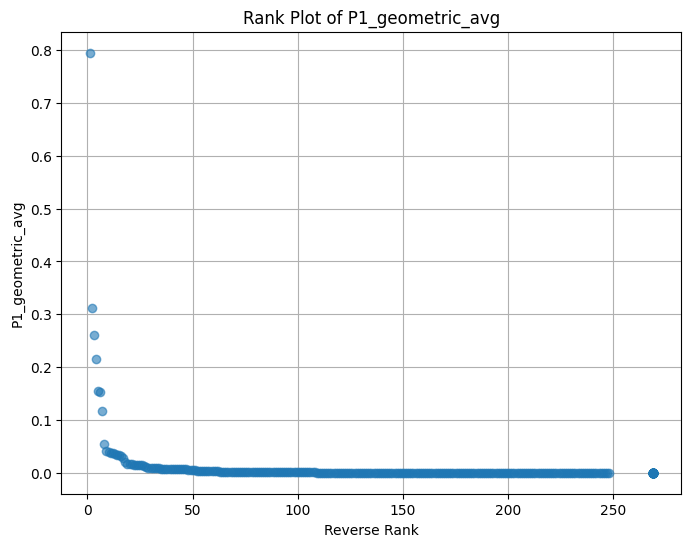

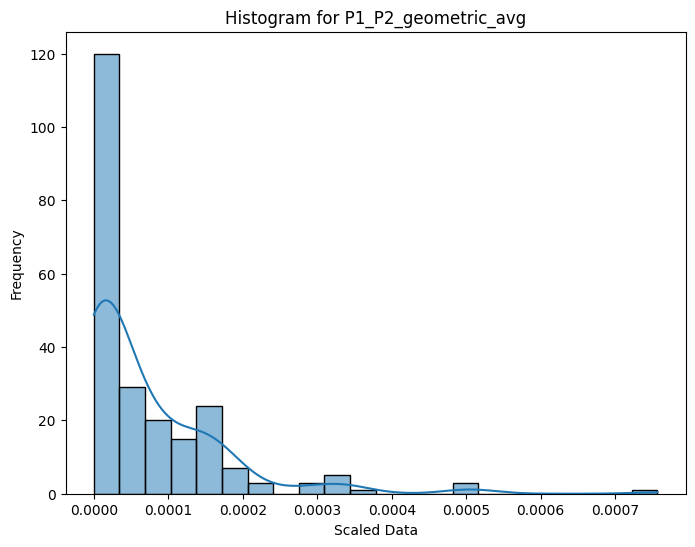

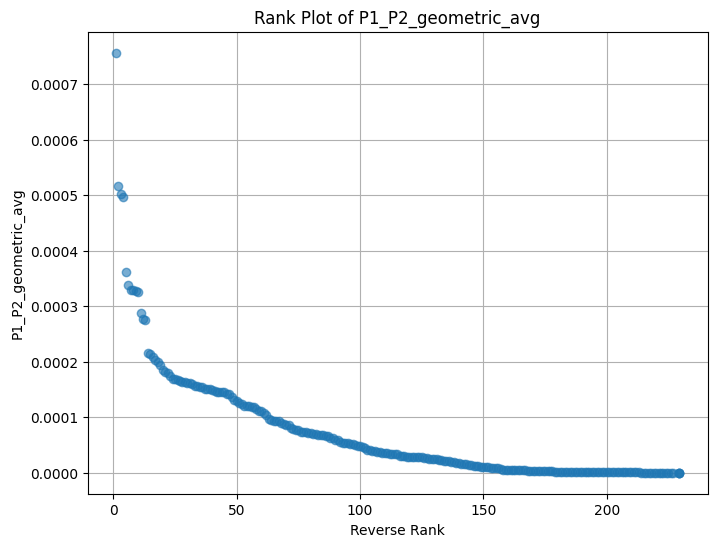

    ISO3  P1_geometric_avg  P2_arithmetic_avg  P1_P2_geometric_avg
0    ABW      1.504922e-08           2.546060             0.020679
1    AFG      3.155871e-02           6.725466             3.658874
2    AGO      3.689694e-03           8.315066             1.920225
3    AIA      1.805737e-09           0.239390             0.004638
4    ALA      1.000000e-10                NaN                  NaN
..   ...               ...                ...                  ...
257  xSI      1.000000e-10                NaN                  NaN
258  xSK      1.000000e-10                NaN                  NaN
259  xSR      1.000000e-10                NaN                  NaN
260  xUK      5.167795e-07                NaN                  NaN
261  xxx      1.101910e-07                NaN                  NaN

[262 rows x 4 columns]


In [127]:
import numpy as np
from scipy.stats import gmean

# Step 1: Calculate Geometric Mean between '_absolute' and '_relative' columns for df_P1
# List of columns ending with '_absolute' and '_relative'
absolute_columns = [col for col in df_P1.columns if '_absolute' in col]
relative_columns = [col for col in df_P1.columns if '_relative' in col]

# Calculate geometric mean for each pair of '_absolute' and '_relative' columns
for abs_col, rel_col in zip(absolute_columns, relative_columns):
    # Apply geometric mean for each pair, ignoring NaN values
    df_P1[abs_col + '_mean'] = df_P1[[abs_col, rel_col]].apply(
        lambda row: gmean(row.dropna() + 1e-10) if len(row.dropna()) > 0 else np.nan, axis=1
    )
    min_value = df_P1[abs_col + '_mean'].min()
    max_value = df_P1[abs_col + '_mean'].max()
    # Scale the df_P1[abs_col + '_mean'] column to range from 0 to 10
    df_P1[abs_col + '_mean'] = 10 *(df_P1[abs_col + '_mean'] - min_value) / (max_value - min_value)

# Step 2: Calculate Geometric Mean across all '_mean' columns in df_P1
# Select columns that are the geometric means (those ending with '_mean')
geometric_mean_columns = [col for col in df_P1.columns if '_mean' in col]

# Calculate the geometric mean for each row across all geometric mean columns
df_P1['P1_geometric_avg'] = df_P1[geometric_mean_columns].apply(
    lambda row: gmean(row[row.notna()] + 1e-10) if np.any(row.notna()) else np.nan, axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(df_P1['P1_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
df_P1['rank_reverse'] = df_P1['P1_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(df_P1['rank_reverse'], df_P1['P1_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_geometric_avg")
plt.title(f"Rank Plot of P1_geometric_avg")
plt.grid(True)
plt.show()


# Step 2: Apply Min-Max scaling to 'P1_geometric_avg' based on the plot
df_P1['P1_geometric_avg'] = np.clip(df_P1['P1_geometric_avg'], 0, 0.005)

# Step 6: Apply Min-Max Scaling to 'P1_p2_geometric_avg' to the range 0-10
min_value = df_P1['P1_geometric_avg'].min()
max_value = df_P1['P1_geometric_avg'].max()

# Scale the 'P1_geometric_avg' column to range from 0 to 10
df_P1['P1_geometric_avg'] = 10 * (df_P1['P1_geometric_avg'] - min_value) / (max_value - min_value)

# Step 3: Group by 'ISO3' and calculate the average of 'P1_geometric_avg' for each 'ISO3'
df_P1_grouped = df_P1.groupby('ISO3', as_index=False)['P1_geometric_avg'].mean()

# Step 4: Merge df_P1_grouped with df_P2 on 'ISO3'
merged_df = df_P1_grouped.merge(df_P2[['iso3', 'P2_arithmetic_avg']], left_on='ISO3', right_on='iso3', how='left')

# Step 5: Calculate the Geometric Mean between 'P1_geometric_avg' and 'P2_arithmetic_avg'
merged_df['P1_P2_geometric_avg'] = merged_df.apply(
    lambda row: gmean([row['P1_geometric_avg'], row['P2_arithmetic_avg']] + [1e-10])
    if not np.isnan(row['P1_geometric_avg']) and not np.isnan(row['P2_arithmetic_avg']) else np.nan, axis=1
)

# Plot histogram and normality check
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['P1_P2_geometric_avg'], kde=True)
plt.title(f"Histogram for P1_P2_geometric_avg")
plt.xlabel("Scaled Data")
plt.ylabel("Frequency")
plt.show()

# Compute ranks in reverse order
merged_df['rank_reverse'] = merged_df['P1_P2_geometric_avg'].rank(method='average', ascending=False)
plt.figure(figsize=(8, 6))
plt.plot(merged_df['rank_reverse'], merged_df['P1_P2_geometric_avg'], marker='o', linestyle='', alpha=0.6)
plt.xlabel("Reverse Rank")
plt.ylabel("P1_P2_geometric_avg")
plt.title(f"Rank Plot of P1_P2_geometric_avg")
plt.grid(True)
plt.show()

#final clip and normalization!!!
merged_df['P1_P2_geometric_avg'] = np.clip(merged_df['P1_P2_geometric_avg'], 0, 0.0025)

# Step 6: Apply Min-Max Scaling to 'P1_p2_geometric_avg' to the range 0-10
min_value = merged_df['P1_P2_geometric_avg'].min()
max_value = merged_df['P1_P2_geometric_avg'].max()
# Scale the 'P1_p2_geometric_avg' column to range from 0 to 10
merged_df['P1_P2_geometric_avg'] = 10 * (merged_df['P1_P2_geometric_avg'] - min_value) / (max_value - min_value)

# Now 'merged_df' contains the scaled 'P1_p2_geometric_avg_scaled'
print(merged_df[['ISO3', 'P1_geometric_avg', 'P2_arithmetic_avg', 'P1_P2_geometric_avg']])


In [117]:
np.max(merged_df['P1_P2_geometric_avg'])

10.0

In [128]:
merged_df.to_csv('/content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri.csv', index=False)

In [119]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file as a GeoDataFrame
geo_df = gpd.read_file("/content/drive/MyDrive/CCRI_results_misc/child_pop_summaryadm0_geojson.geojson")


In [115]:

# Ensure the key for merging is consistent (e.g., 'ISO3' in df_P1 and 'iso3' in df_P2)
# Merge with merged_df (use 'ISO3' from merged_df and 'iso3' from geo_df or merged_df as needed)
merged_geo_df = geo_df.merge(merged_df, left_on='ISO3', right_on='ISO3', how='left')

# Save the merged GeoDataFrame as a new GeoJSON file
output_geojson = "/content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri.geojson"
merged_geo_df.to_file(output_geojson, driver='GeoJSON')

print(f"Merged GeoDataFrame saved to {output_geojson}")

Merged GeoDataFrame saved to /content/drive/MyDrive/CCRI_results_misc/p1_p2_avg_ccri.geojson


In [120]:
merged_df.describe()

,P1_geometric_avg,P2_arithmetic_avg,P1_P2_geometric_avg,rank_reverse
count,262.000000,231.000000,231.000000,231.000000
mean,2.642877,3.013642,3.126456,116.000000
std,3.849244,2.594713,3.162138,66.826772
min,0.000000,0.000000,0.000000,1.000000
25%,0.000116,0.643171,0.184426,58.500000
50%,0.195364,2.436768,1.774703,116.000000
75%,3.870847,4.617816,6.022462,173.500000
max,10.000000,10.000000,10.000000,227.500000


In [121]:
df_P1['P1_geometric_avg'].describe()

,P1_geometric_avg
count,289.000000
mean,2.483120
std,3.835996
min,0.000000
25%,0.000026
50%,0.088766
75%,3.616511
max,10.000000
